In [4]:
from cvxpy import *
import numpy as np
import scipy.spatial.distance as sdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sklearn.metrics as sk
from sklearn import decomposition

In [5]:
X = np.fromfile("../bb_ly_sincos.dat")
X = np.reshape(X, [10010, 512])

Xassign = []
for i in range(10):
    for j in range(100):
        Xassign.append(i)
Xassign = np.asarray(Xassign)

Xassign_100 = []
for i in range(10):
    for j in range(10):
        Xassign_100.append(i)
Xassign_100 = np.asarray(Xassign_100)


Xassign_10 = []
for i in range(10):
    Xassign_10.append(i)
Xassign_10 = np.asarray(Xassign_10)


Xassign_1000 = []
for i in range(10):
    for j in range(1000):
        Xassign_1000.append(i)
Xassign_1000 = np.asarray(Xassign_1000)
Xassign_1000.shape

Xassign_1010 = []
for i in range(10):
    for j in range(1001):
        Xassign_1010.append(i)
Xassign_1010 = np.asarray(Xassign_1010)
Xassign.shape

(1000,)

In [6]:
X0 = np.array(X[0:1000])
X1 = np.array(X[1000:2000])
X2 = np.array(X[2000:3000])
X3 = np.array(X[3000:4000])
X4 = np.array(X[4000:5000])
X5 = np.array(X[5000:6000])
X6 = np.array(X[6000:7000])
X7 = np.array(X[7000:8000])
X8 = np.array(X[8000:9000])
X9 = np.array(X[9000:10000])

X0_set = np.array(np.vsplit(X0, 100))
X1_set = np.array(np.vsplit(X1, 100))
X2_set = np.array(np.vsplit(X2, 100))
X3_set = np.array(np.vsplit(X3, 100))
X4_set = np.array(np.vsplit(X4, 100))
X5_set = np.array(np.vsplit(X5, 100))
X6_set = np.array(np.vsplit(X6, 100))
X7_set = np.array(np.vsplit(X7, 100))
X8_set = np.array(np.vsplit(X8, 100))
X9_set = np.array(np.vsplit(X9, 100))

print(X0.shape)

X0_mixed = np.zeros(X0_set.shape)
X1_mixed = np.zeros(X0_set.shape)
X2_mixed = np.zeros(X0_set.shape)
X3_mixed = np.zeros(X0_set.shape)
X4_mixed = np.zeros(X0_set.shape)
X5_mixed = np.zeros(X0_set.shape)
X6_mixed = np.zeros(X0_set.shape)
X7_mixed = np.zeros(X0_set.shape)
X8_mixed = np.zeros(X0_set.shape)
X9_mixed = np.zeros(X0_set.shape)


X_all_orig = np.array([X0_set,X1_set,X2_set,X3_set,X4_set,
                 X5_set,X6_set,X7_set,X8_set,X9_set])
j = 0
for i in range(10):
    X0_mixed[j:j+10] = X_all_orig[i][0:10]
    j+=10
    
j = 0
for i in range(10):
    X1_mixed[j:j+10] = X_all_orig[i][10:20]
    j+=10
    
j = 0
for i in range(10):
    X2_mixed[j:j+10] = X_all_orig[i][20:30]
    j+=10
    
j = 0
for i in range(10):
    X3_mixed[j:j+10] = X_all_orig[i][30:40]
    j+=10
    
j = 0
for i in range(10):
    X4_mixed[j:j+10] = X_all_orig[i][40:50]
    j+=10
    
j = 0
for i in range(10):
    X5_mixed[j:j+10] = X_all_orig[i][50:60]
    j+=10
    
j = 0
for i in range(10):
    X6_mixed[j:j+10] = X_all_orig[i][60:70]
    j+=10
    
j = 0
for i in range(10):
    X7_mixed[j:j+10] = X_all_orig[i][70:80]
    j+=10
    
j = 0
for i in range(10):
    X8_mixed[j:j+10] = X_all_orig[i][80:90]
    j+=10
    
j = 0
for i in range(10):
    X9_mixed[j:j+10] = X_all_orig[i][90:100]
    j+=10
    

X_all_mixed = np.array([X0_mixed,X1_mixed,X2_mixed,X3_mixed,X4_mixed,
                      X5_mixed,X6_mixed,X7_mixed,X8_mixed,X9_mixed])

# for i in range(10):
#     X_all_mixed[i] = np.vstack(X_all_mixed[i])
    
# X0_mixed.shape
# X0_set = np.array(np.vstack(X0_set))
X0_mixed = np.vstack(X0_mixed)
X1_mixed = np.vstack(X1_mixed)
X2_mixed = np.vstack(X2_mixed)
X3_mixed = np.vstack(X3_mixed)
X4_mixed = np.vstack(X4_mixed)
X5_mixed = np.vstack(X5_mixed)
X6_mixed = np.vstack(X6_mixed)
X7_mixed = np.vstack(X7_mixed)
X8_mixed = np.vstack(X8_mixed)
X9_mixed = np.vstack(X9_mixed)


X_all_mixed = np.array([X0_mixed,X1_mixed,X2_mixed,X3_mixed,X4_mixed,
                      X5_mixed,X6_mixed,X7_mixed,X8_mixed,X9_mixed])

(1000, 512)


In [7]:
def my_subspace_clustering(mix_set):
    ## Solve for each point as a linear system
    ## with respect to all other points using
    ## convex optimization routines
    ## Basically, we express each point as a
    ## linear combination of the other points...
    
    ## Here we try to minimize the dot-product between
    ## the coefficients. Sparsity is only needed in
    ## dot-product space in-so-far as possible.
    X = mix_set
    A = X.T
    Coeff = np.zeros([np.shape(A)[1],np.shape(A)[1]])
    print('Calculating coefficients and performing optimization...')
    for i in range(np.shape(A)[1]):
        # gamma must be positive due to DCP rules.
        gamma = Parameter(nonneg=True)
        constraints = None
        
        # Construct the problem.
        x = Variable(np.shape(A)[1])
    
        ## Lasso; consider changing (x, 1) --> (x, 2)
        obj = Minimize(gamma*norm(A*x-A[:,i],2) + norm(x, 2))
        constraints = [x[i] == 0]
        ## constraints = [x[i] == 0, sum(x) == 1]
    
        ## L1-Perfect
        ## obj = Minimize(norm(x, 1))
        ## constraints = [A*x == b, x[i] == 0, sum(x) == 1]
    
        ## L1-Noisy
        ## obj = Minimize(norm(x, 1))
        ## constraints = [ A*x - b <= gamma, x[i] == 0, sum(x) == 1 ]
    
        if [constraints == None]:
            prob = Problem(obj)
        else:
            prob = Problem(obj,constraints)
    
        ## From the original code
        gamma.value = 0.01
        prob.solve(solver='MOSEK')
        
        Coeff[:,i] = np.transpose(x.value)
    print('Done!')
    ## Refine results...
    ## Only use magnitude of the coefficients (no negative values)
    print('Extra steps (abs/sym)...')
    Coeff = np.abs(Coeff)
    ## Normalize each row - not needed but doesn't hurt on most examples
    ## Coeff = Coeff / numpy.apply_along_axis(numpy.max,1,Coeff)[:,None]
    ## Symmetrize
    Coeff = Coeff + np.transpose(Coeff)
    print('Done!')
    ## Standard...
    print('Performing eigen decomp...')
    Xaff = Coeff
    
    ## Get row sums
    Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))
    
    ## Normalization
    Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)
    
    ## Might not want to show this if the data sizes (N1,N2)
    ## are large...
    # plt.imshow(Xnorm)
    # plt.show()
    ## Decomposition
    Evals, Evecs = np.linalg.eigh(Xnorm)
    print('Done!')
    ## Perform clustering
    Xnew = Evecs[:,[-1,-2,-3,-4,-5,-6,-7,-8,-9]]
    kmeans = KMeans(n_clusters=10).fit(Xnew)
    
    ## If you want to see the eigen vectors...
    ## Xone = Evecs[kmeans.labels_==0,:]
    ## Xtwo = Evecs[kmeans.labels_==1,:]
    ## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')
    
    ## If you want it on the PCA projection...
    pca = decomposition.PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
    plt.scatter(X_pca[:, 0], X_pca[:, 1],
               color=[color[i] for i in Xassign.astype(int)],
               s=20)
    plt.title('Ground-truth')
    plt.show()
    plt.scatter(X_pca[:, 0], X_pca[:, 1],
               color=[color[i] for i in kmeans.labels_.astype(int)],
               s=20)
    plt.title('Subspace')
    plt.show()
    ## Let's quantify the performance
    jointPDF = np.zeros([10,10])
    for x in range(len(Xassign)):
        jointPDF[Xassign[x],kmeans.labels_[x]] += 1
    jointPDF /= len(Xassign)
    jointPDF += 0.000000000000001
    marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
    print('Mutual Information')
    print(np.sum(jointPDF*np.log2(jointPDF/marginals)))
    print('NMI')
    print(sk.normalized_mutual_info_score(Xassign,kmeans.labels_))

Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
Done!
Performing eigen decomp...
Done!
Mutual Information
1.1182888504574613
0.3424642837197014
Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
Done!
Performing eigen decomp...
Done!
Mutual Information
2.143047813512629
0.6614484017951003
Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
Done!
Performing eigen decomp...
Done!
Mutual Information
2.707254078695148
0.8244613562130408
Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
Done!
Performing eigen decomp...
Done!
Mutual Information
3.171666016504595
0.9551513932986606
Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
Done!
Performing eigen decomp...
Done!
Mutual Information
3.2769430471582943
0.9864858767431024
Calculating coefficients and performing optimization...
Done!
Extra steps (abs/sym)...
D

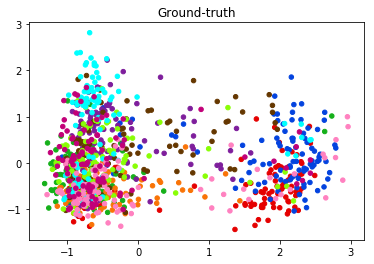

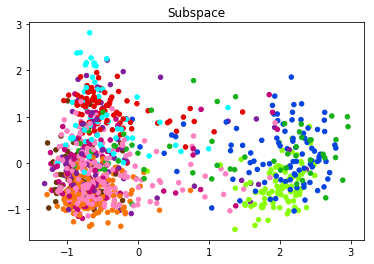

C:\Users\ekim\Anaconda3\envs\MyCondaProject\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ekim\Anaconda3\envs\MyCondaProject\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ekim\Anaconda3\envs\MyCondaProject\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ekim\Anaconda3\envs\MyCondaProject\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change

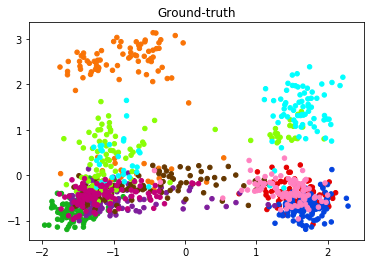

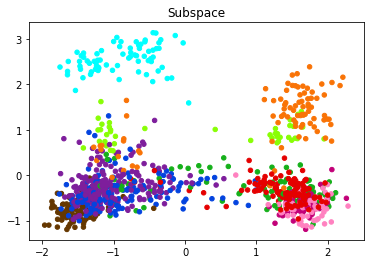

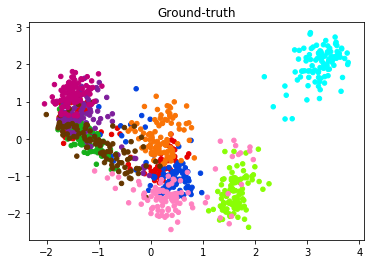

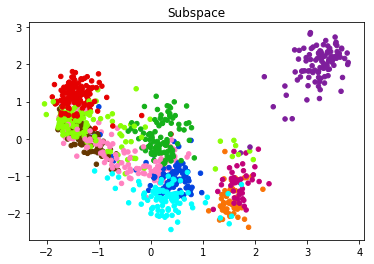

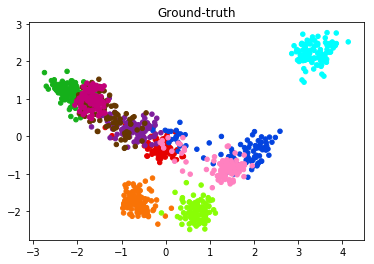

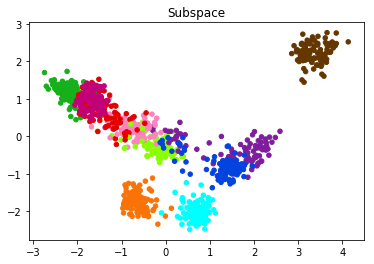

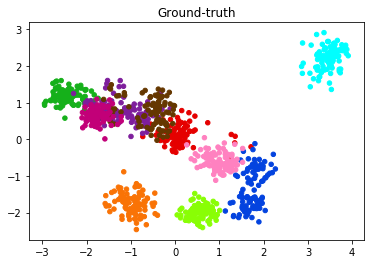

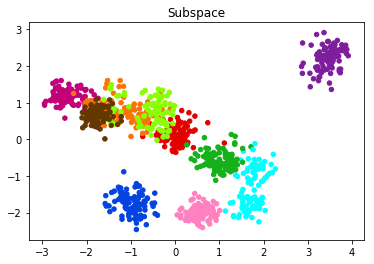

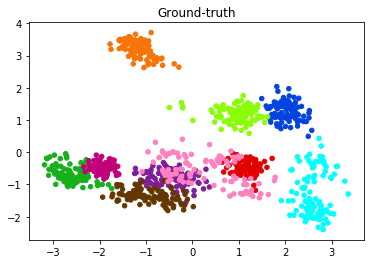

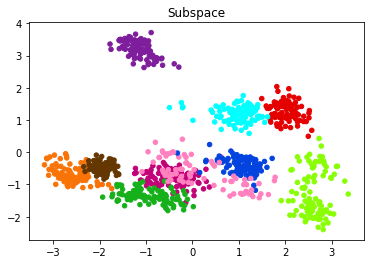

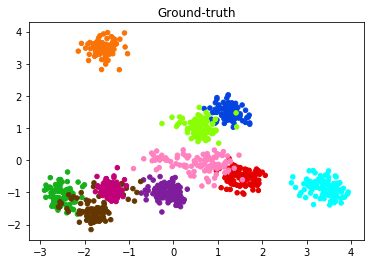

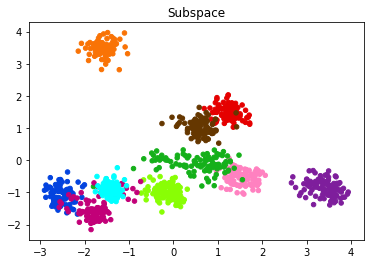

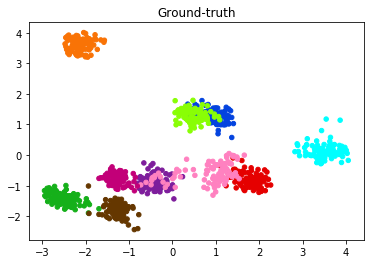

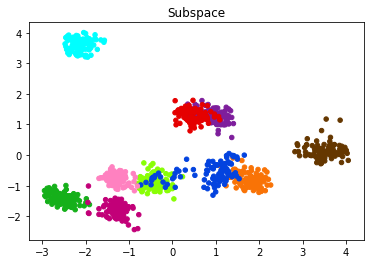

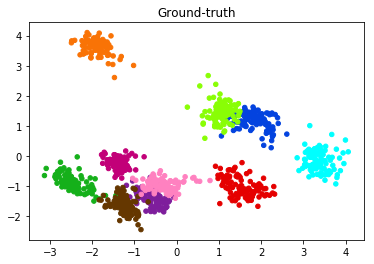

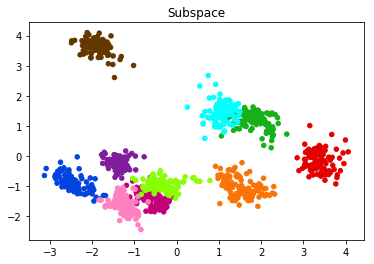

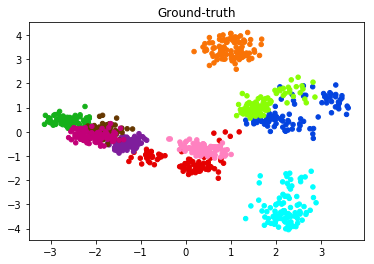

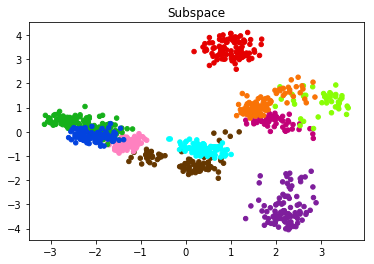

In [8]:
for j in X_all_mixed:
    my_subspace_clustering(j)

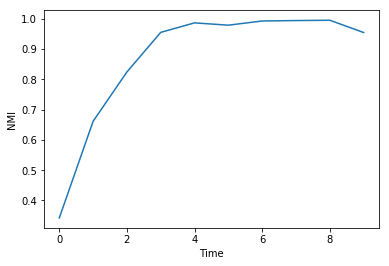

In [9]:
NMI_set = [0.3424642837197014, 0.6614484017951003, 0.8244613562130408, 0.9551513932986606, 0.9864858767431024,
           0.978805486556702, 0.9927058523374561, 0.9941285612294403, 0.9951357685303148, 0.9545416674262652]
NMI_plot = np.asarray(NMI_set)
plt.ylabel('NMI')
plt.xlabel('Time')
plt.plot(NMI_plot)
plt.show()
